# **LINEAR REGRESSION FOR STOCK PREDICTION (APPLIED)**

Importing necessary libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Load and preprocess the data

In [67]:
df = pd.read_csv("Nifty_1y.csv")

Remove extra spaces from column names

In [68]:
df.columns = df.columns.str.strip()

Convert 'Date' column to datetime format and sort the data chronologically

In [69]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df = df.sort_values('Date')

Create 'PrevClose' column for previous day's closing price

In [70]:
df['PrevClose'] = df['Close'].shift(1)

Remove the first row (because PrevClose will be NaN there)

In [71]:
df = df.dropna()

**MODEL 1: OPEN PRICE AS FEATURE**

In [72]:
feature_cols = ['Open']
X = df[feature_cols]
y = df['Close']

Train Linear Regression model

In [73]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Predict for the last day in the dataset

In [74]:
last_day_features = pd.DataFrame(X.iloc[-1].values.reshape(1, -1), columns=feature_cols)
pred_last_day = model.predict(last_day_features)[0]
actual_last_day = df['Close'].iloc[-1]

In [75]:
print(f"Predicted Close for {df['Date'].iloc[-1]}: {pred_last_day:.2f}")
print(f"Actual Close: {actual_last_day:.2f}")

Predicted Close for 2025-08-11 00:00:00: 24361.82
Actual Close: 24585.05


Predict the next day's close using last day's close as 'Open'

In [76]:
last_close = actual_last_day
next_day_features = pd.DataFrame([[last_close]], columns=feature_cols)
pred_next_day = model.predict(next_day_features)[0]

In [77]:
print(f"Predicted Close for {df['Date'].iloc[-1].date() + pd.Timedelta(days=1)}: {pred_next_day:.2f}")

Predicted Close for 2025-08-12: 24570.67


Add predictions for visualization

In [78]:
df['Predicted_Close'] = model.predict(X)

Evaluating Model 1 accuracy using R² Score, MAE and RMSE

In [79]:
y_pred_all = model.predict(X)
r2 = r2_score(y, y_pred_all)
mae = mean_absolute_error(y, y_pred_all)
rmse = np.sqrt(mean_squared_error(y, y_pred_all))

print("\nModel 1 (Open, PrevClose)")
print(f"Model R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model 1 (Open, PrevClose)
Model R² Score: 0.9698
Mean Absolute Error (MAE): 122.8037
Root Mean Squared Error (RMSE): 159.9467


Plot Open vs Close (Model 1)

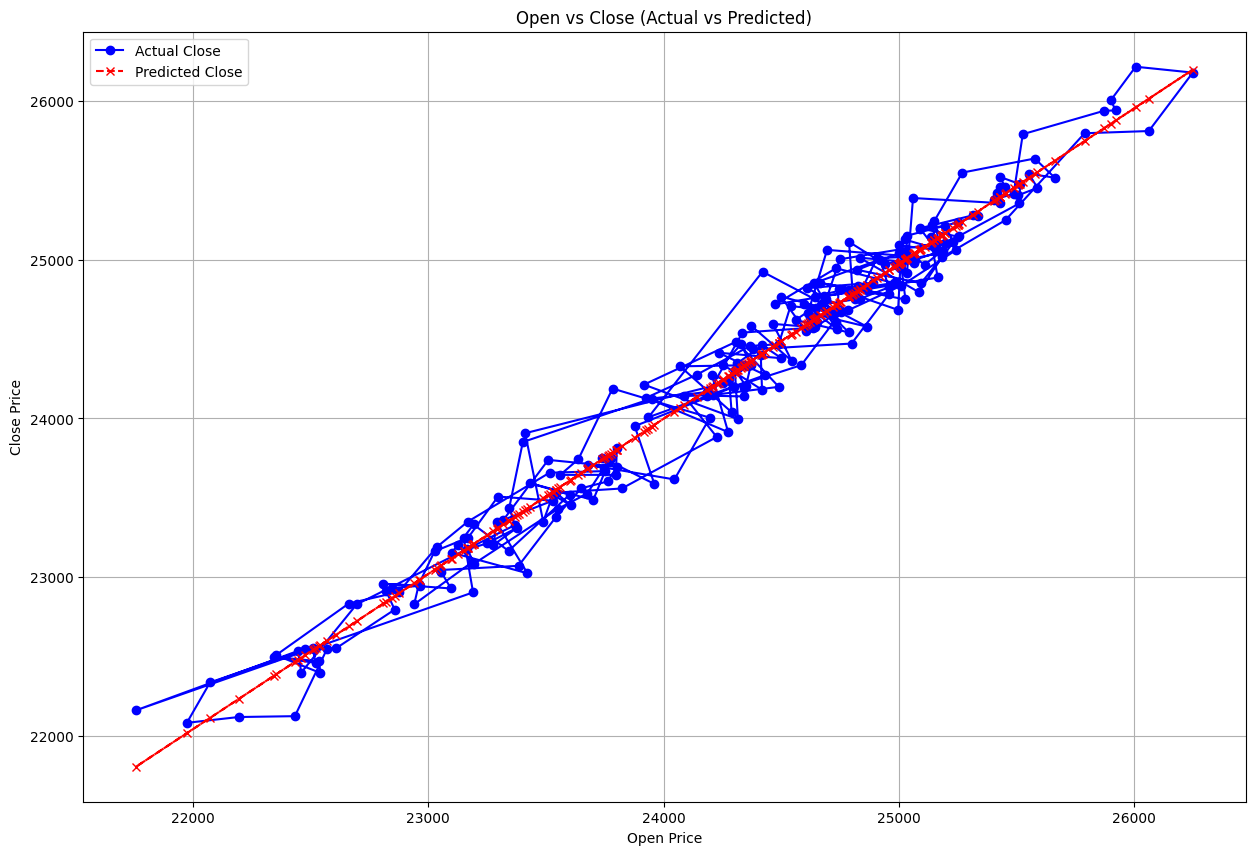

In [80]:
plt.figure(figsize=(15, 10))
plt.plot(df['Open'], df['Close'], label='Actual Close', color='blue', marker='o')
plt.plot(df['Open'], df['Predicted_Close'], label='Predicted Close', color='red', linestyle='--', marker='x')
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Open vs Close (Actual vs Predicted)")
plt.legend()
plt.grid(True)
plt.show()

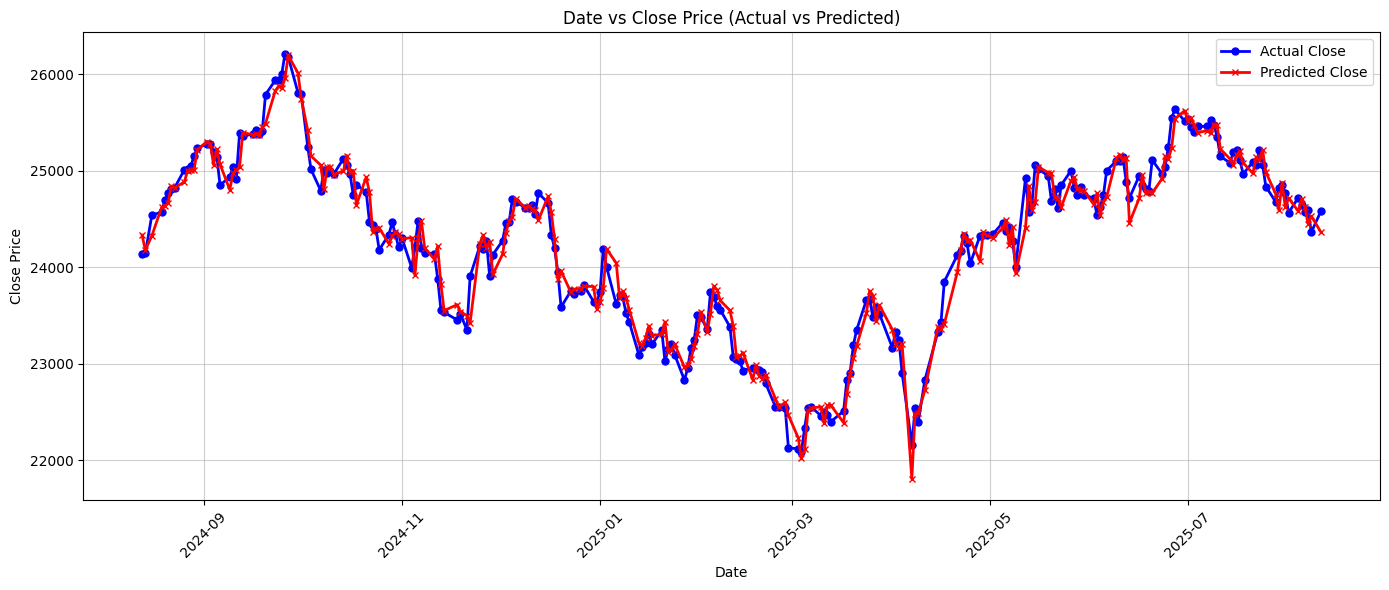

In [81]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close', color='blue', linewidth=2, marker='o', markersize=5)
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close', color='red', linewidth=2, marker='x', markersize=5)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Date vs Close Price (Actual vs Predicted)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.6)

plt.tight_layout()
plt.show()


**MODEL 2: OPEN, HIGH, LOW AS FEATURES**

In [82]:
feature_cols = ['Open', 'High', 'Low', 'PrevClose']
X = df[feature_cols]
y = df['Close']

Train Linear Regression model

In [83]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Predict for the last day in the dataset

In [84]:
last_day_features = pd.DataFrame(X.iloc[-1].values.reshape(1, -1), columns=feature_cols)
pred_last_day = model.predict(last_day_features)[0]
actual_last_day = df['Close'].iloc[-1]

Predict for the next day (using last day's close for all features)

In [85]:
next_day_date = df['Date'].iloc[-1] + pd.Timedelta(days=1)
next_day_features = pd.DataFrame(
    [[last_close, last_close, last_close, last_close]],
    columns=feature_cols
)
pred_next_day = model.predict(next_day_features)[0]

In [86]:
print(f"Predicted Close for {df['Date'].iloc[-1].date() + pd.Timedelta(days=1)}: {pred_next_day:.2f}")

Predicted Close for 2025-08-12: 24573.48


Append next day's prediction to dataframe

In [87]:
df_pred = df.copy()
df_pred = pd.concat([df_pred, pd.DataFrame({
    'Date': [next_day_date],
    'Close': [pred_next_day]
})], ignore_index=True)

Evaluating Model 2 accuracy using R² Score, MAE and RMSE

In [88]:
y_pred2 = model.predict(X)
r2_2 = r2_score(y, y_pred2)
mae_2 = mean_absolute_error(y, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y, y_pred2))

print("\nModel 2 (Open, High, Low, PrevClose)")
print(f"R² Score: {r2_2:.4f}")
print(f"MAE: {mae_2:.4f}")
print(f"RMSE: {rmse_2:.4f}")


Model 2 (Open, High, Low, PrevClose)
R² Score: 0.9951
MAE: 47.6230
RMSE: 64.4968


Plot Open, High, Low vs Close (Model 2)

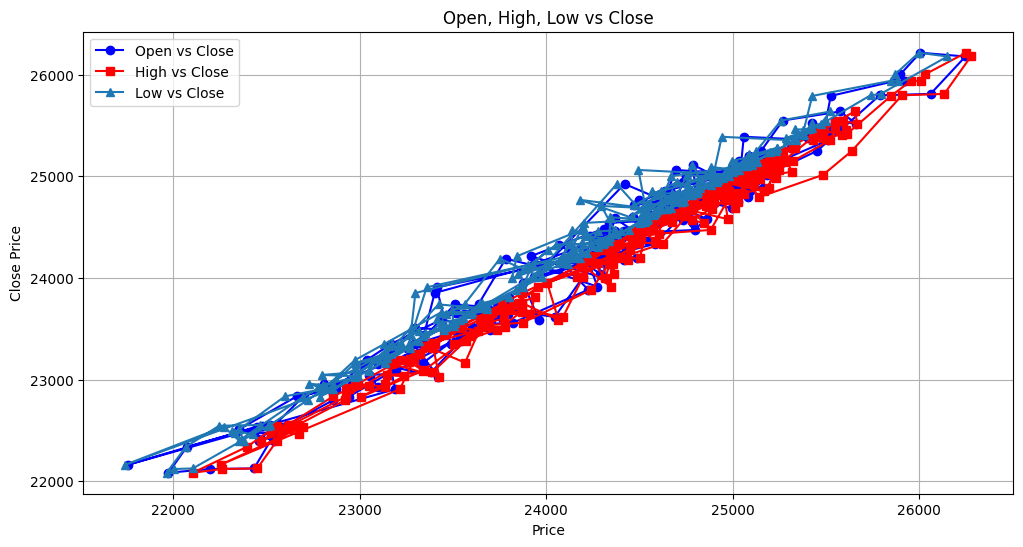

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], df['Close'], label='Open vs Close', marker='o', color='blue')
plt.plot(df['High'], df['Close'], label='High vs Close', marker='s', color='red')
plt.plot(df['Low'], df['Close'], label='Low vs Close', marker='^')
plt.xlabel("Price")
plt.ylabel("Close Price")
plt.title("Open, High, Low vs Close")
plt.legend()
plt.grid(True)
plt.show()

Plot Open, High, Low vs Close Over Time

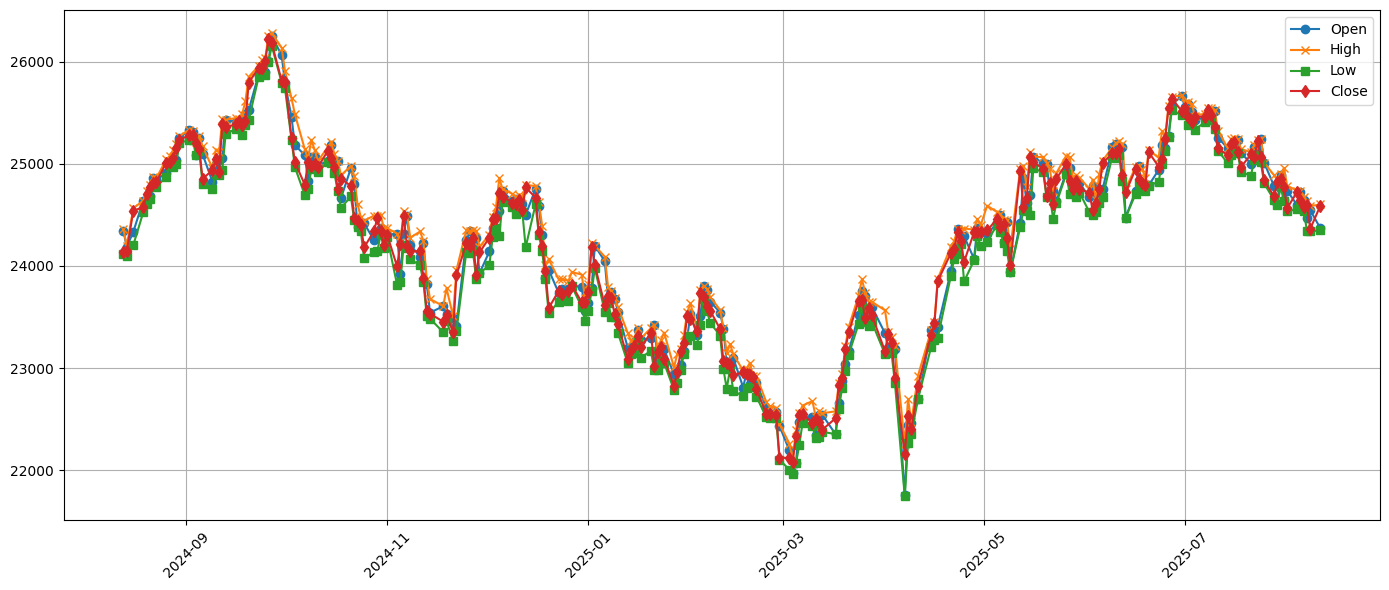

In [90]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Open'], label='Open', marker='o')
plt.plot(df['Date'], df['High'], label='High', marker='x')
plt.plot(df['Date'], df['Low'], label='Low', marker='s')
plt.plot(df['Date'], df['Close'], label='Close', marker='d')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot Actual vs. Predicted Closing Prices

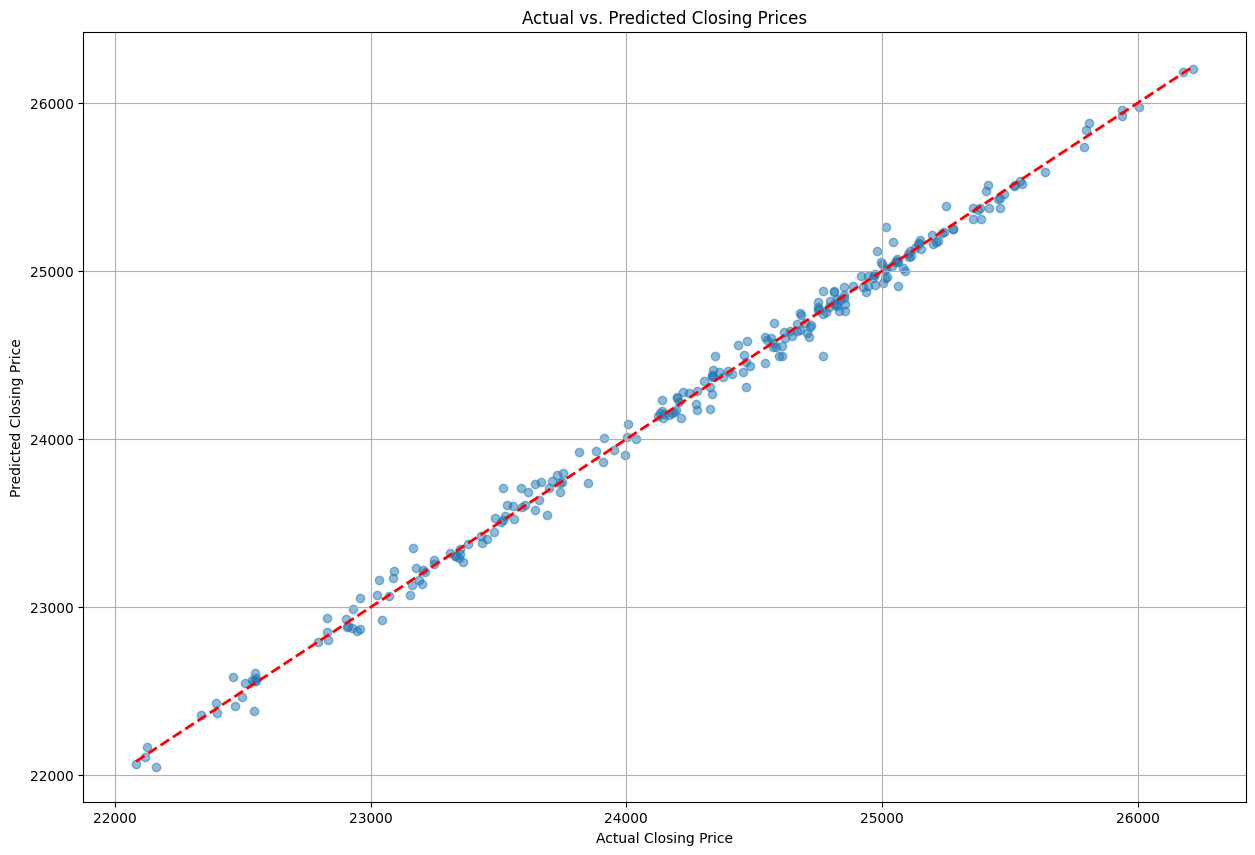

In [91]:
all_predictions = model.predict(X)
plt.figure(figsize=(15, 10))
plt.scatter(y, all_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.grid(True)
plt.show()

Time Series Plot with Next Day Prediction

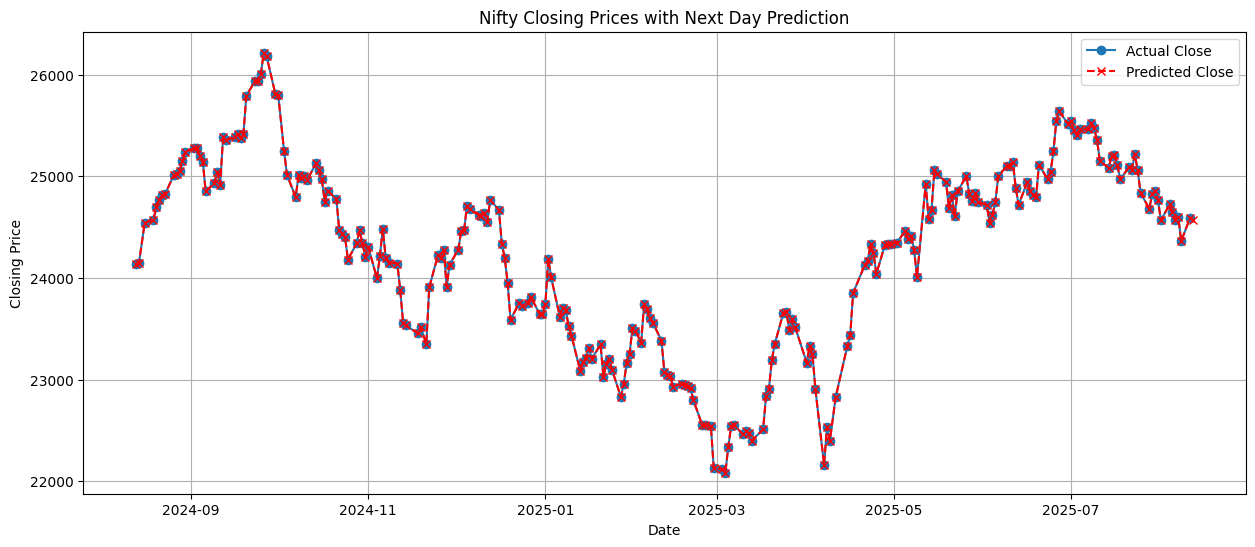

In [92]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close', marker='o')
plt.plot(df_pred['Date'], df_pred['Close'], label='Predicted Close', marker='x', linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Nifty Closing Prices with Next Day Prediction")
plt.legend()
plt.grid(True)
plt.show()

Correlation matrix for 'Open', 'High', 'Low', 'Close', 'Predicted_Close'

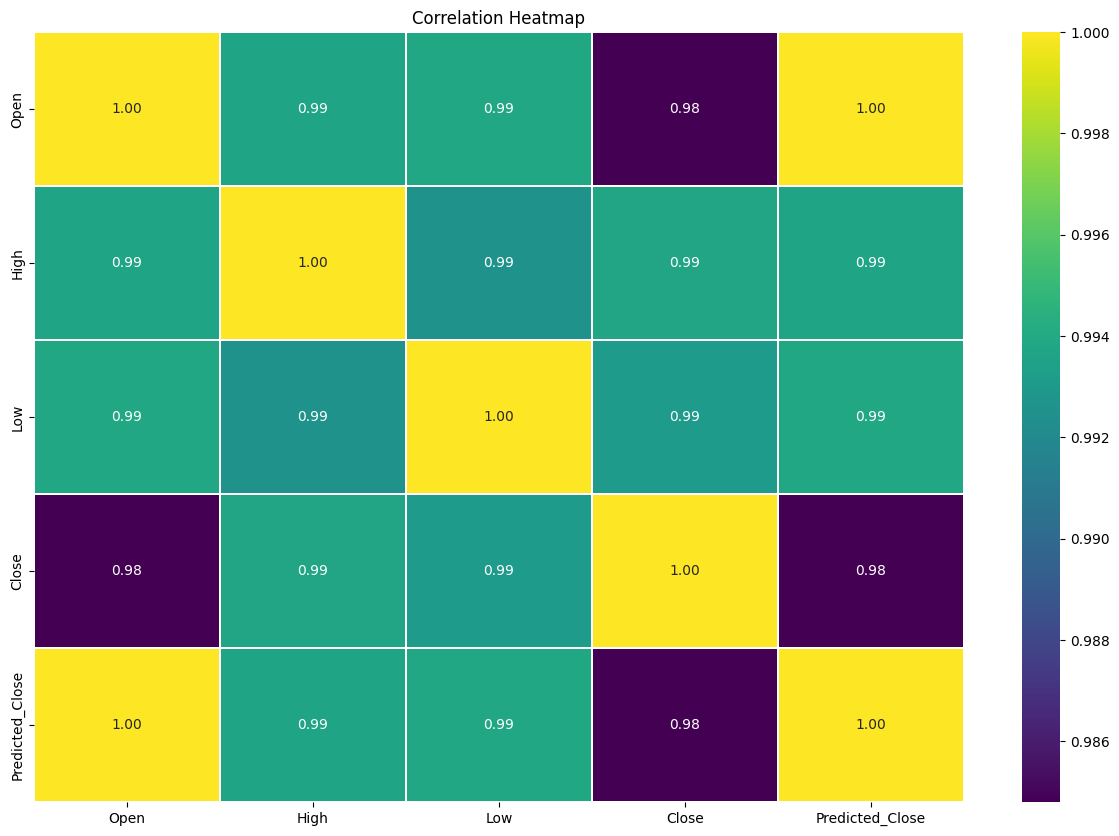

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df[['Open', 'High', 'Low', 'Close', 'Predicted_Close']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f", linewidths=0.25)
plt.title("Correlation Heatmap")
plt.show()
